# Optimización

Bienvenidos al Notebook de Optimización Aplicada en la Industria, donde exploraremos tres áreas clave en las que los métodos de optimización juegan un papel fundamental para la toma de decisiones eficientes y la mejora en la productividad de las empresas.

En este notebook, abordaremos los siguientes temas:

**Métodos de Optimización Unidimensionales**: Exploraremos técnicas básicas para encontrar soluciones óptimas en problemas que involucran una única variable, como la optimización de costos en la producción de una empresa.

**Balanceo de Inventarios y Producción**: Veremos cómo equilibrar la producción diaria con la demanda variable de los clientes, minimizando los costos de almacenamiento y de faltantes.

**Problema del Viajante de Comercio (TSP)**: Resolveremos uno de los problemas clásicos de optimización, que consiste en encontrar la ruta más corta para un repartidor que necesita visitar diferentes puntos y regresar al punto de origen.

La optimización es esencial para reducir costos, mejorar la logística y garantizar la eficiencia en la producción. A lo largo del notebook, también aprenderás cómo implementar y entender estos problemas mediante Python, utilizando herramientas como scipy.optimize y técnicas como la búsqueda exhaustiva.

#1. Introducción a la Optimización
La optimización es el proceso de hacer algo lo mejor posible bajo las circunstancias dadas. En la producción, esto incluye la minimización de costos, la maximización de la eficiencia y la reducción del tiempo de ciclo. A menudo, se requiere encontrar el equilibrio adecuado entre estos factores, siempre teniendo en cuenta las restricciones y limitaciones del sistema.

##Definición matemática básica:
Dada una función objetivo 𝑓(𝑥), que puede representar costos o tiempos, y un conjunto de restricciones, el objetivo es encontrar el valor de 𝑥 que minimiza (o maximiza) 𝑓(𝑥).

#2: Métodos de Optimización Unidimensionales
Una de las formas más básicas de optimización es a través de métodos unidimensionales, en los que buscamos el mejor valor de una variable dentro de un rango dado.

##Ejemplo: Optimización de costos en la producción
Supongamos que la empresa vende cada unidad a un precio de $20. La función de beneficio sería:

Beneficio(𝑥) = Ingresos(𝑥) − Costos(𝑥)

Donde:

Ingresos(𝑥) = $20𝑥$ es el ingreso por la venta de 𝑥 unidades.

Costos (𝑥) = $0.1𝑥^2+5𝑥+50$ es la función de costos.

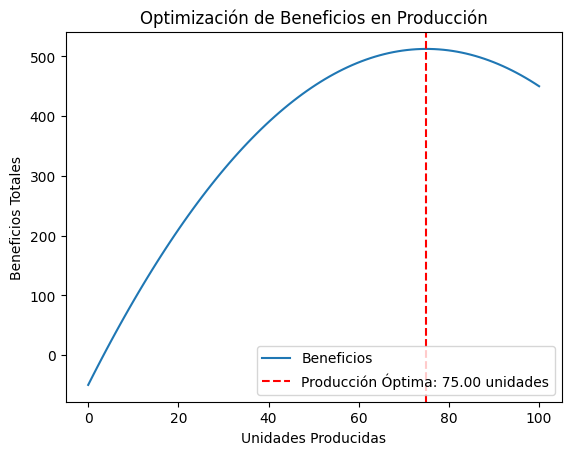

El valor óptimo de producción es 75.00 unidades.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

# Definimos la función de beneficios (Ingresos - Costos)
def beneficios(x):
    ingresos = 20 * x
    costos = 0.1 * x**2 + 5 * x + 50
    return ingresos - costos

# Utilizamos 'minimize_scalar' para encontrar el valor óptimo de producción
resultado = minimize_scalar(lambda x: -beneficios(x), bounds=(0, 100), method='bounded')

# Graficamos la función de beneficios
x = np.linspace(0, 100, 100)  # Rango de valores de producción
y = beneficios(x)  # Cálculo de los beneficios para cada valor de producción

plt.plot(x, y, label="Beneficios")
plt.axvline(x=resultado.x, color='r', linestyle='--', label=f"Producción Óptima: {resultado.x:.2f} unidades")
plt.title("Optimización de Beneficios en Producción")
plt.xlabel("Unidades Producidas")
plt.ylabel("Beneficios Totales")
plt.legend()
plt.show()

# Imprimimos el resultado de producción óptima
print(f"El valor óptimo de producción es {resultado.x:.2f} unidades.")

#3: Balanceo de Inventarios y Producción
##Descripción del problema:
En este caso, estamos optimizando la cantidad diaria de producción de una planta que fabrica piezas para un cliente cuya demanda varía día a día. Nuestro objetivo es minimizar el costo total, que es la combinación de los costos de almacenar inventario y los costos generados por no cumplir con la demanda (costos de faltantes).

###La lógica del problema es la siguiente:

**Demanda diaria variable**: No todos los días se requiere la misma cantidad de piezas.

**Inventario**: Si producimos más de lo que se demanda, generamos inventario que tiene un costo de almacenamiento.

**Faltante**: Si producimos menos de lo que se demanda, hay un costo de faltante por no cumplir con los requerimientos del cliente.

**Optimización**: Queremos encontrar una cantidad de producción diaria que minimice estos dos costos.

###Pseudocódigo de la solución:
1. Inicializar inventario en cero y costos totales en cero.

2. Para cada día:

- Restar la demanda diaria de la producción diaria.

- Si la producción es mayor que la demanda, actualizar el inventario y sumar el costo de almacenamiento.

- Si la producción es menor que la demanda, calcular el costo por faltantes.

3. Sumar todos los costos y devolver el costo total para esa cantidad de producción diaria.

4. Usar un algoritmo de optimización para encontrar la cantidad óptima de producción que minimice los costos.

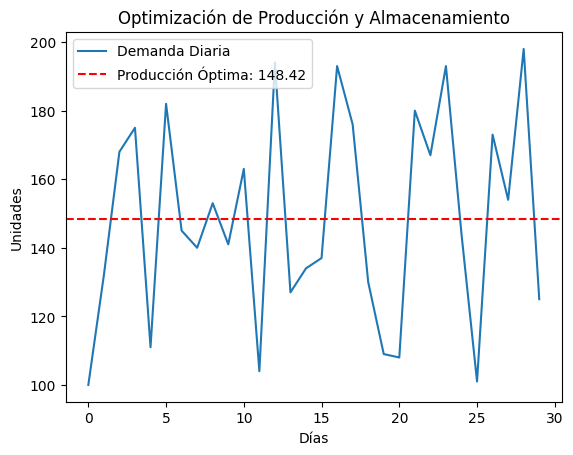

La mejor cantidad de producción diaria es 148.42 unidades.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

# Parámetros del problema
demanda_diaria = np.random.randint(100, 200, size=30)  # Generamos demanda diaria aleatoria entre 100 y 200
costos_almacenamiento = 2  # Costo por almacenar una unidad por día
costos_faltante = 10  # Costo por faltar a la demanda por unidad
produccion_maxima = 180  # Capacidad máxima de producción diaria

# Función para calcular los costos totales (almacenamiento y faltantes)
def balanceo_produccion(produccion_diaria, demanda_diaria, costos_almacenamiento, costos_faltante):
    inventario = 0  # Inicializamos el inventario en cero
    costo_total = 0  # Inicializamos los costos totales en cero

    # Simulación día por día
    for demanda in demanda_diaria:
        inventario += produccion_diaria - demanda  # Calculamos el inventario acumulado
        if inventario > 0:
            # Si hay inventario, aplicamos el costo de almacenamiento
            costo_total += inventario * costos_almacenamiento
        else:
            # Si hay faltante, calculamos el costo por no cumplir con la demanda
            costo_total += abs(inventario) * costos_faltante

    return costo_total  # Devolvemos el costo total calculado para esa producción

# Optimización de la cantidad de producción diaria usando scipy.optimize.minimize_scalar
# Esta función busca el valor que minimiza la función de costos (balanceo_produccion)
mejor_produccion = minimize_scalar(
    balanceo_produccion,
    args=(demanda_diaria, costos_almacenamiento, costos_faltante),  # Argumentos extra para la función de costos
    bounds=(0, produccion_maxima),  # Establecemos que la producción debe estar entre 0 y la capacidad máxima
    method='bounded'  # Usamos el método bounded que restringe el rango de búsqueda
)

# Graficamos la demanda diaria y la producción óptima
plt.plot(demanda_diaria, label="Demanda Diaria")
plt.axhline(y=mejor_produccion.x, color='r', linestyle='--', label=f"Producción Óptima: {mejor_produccion.x:.2f}")
plt.title("Optimización de Producción y Almacenamiento")
plt.xlabel("Días")
plt.ylabel("Unidades")
plt.legend()
plt.show()

# Mostramos el resultado final de la cantidad óptima de producción
print(f"La mejor cantidad de producción diaria es {mejor_produccion.x:.2f} unidades.")

#4. Optimización de Rutas de Distribución (Problema del Viajante de Comercio)
El Problema del Viajante de Comercio consiste en encontrar la ruta más corta para un viajero que necesita visitar un conjunto de ciudades exactamente una vez y regresar al punto de partida. En el contexto de la optimización de rutas de distribución, este problema es muy útil para encontrar la mejor manera de minimizar el tiempo o el costo de entrega entre varias ciudades o puntos de entrega.

###Lógica del TSP
El viajero tiene que visitar n ciudades, y la distancia entre cada par de ciudades se conoce. El objetivo es encontrar el orden en el cual debe visitar las ciudades para que la distancia total recorrida sea mínima. Esto se puede aplicar a muchos problemas logísticos y de transporte.

###Características del Problema:
- Es un problema de optimización combinatoria.
- A medida que el número de ciudades aumenta, el número de rutas posibles crece exponencialmente.
- Esto significa que, para grandes cantidades de ciudades, es computacionalmente costoso resolverlo mediante métodos de fuerza bruta, como probar todas las combinaciones posibles de rutas.

###Enfoques para Resolver el TSP
1. **Búsqueda Exhaustiva**: Este método genera todas las posibles combinaciones de rutas, calcula la distancia total para cada una, y elige la ruta con la distancia mínima. Sin embargo, este enfoque se vuelve inviable a medida que el número de ciudades aumenta debido al crecimiento exponencial del número de rutas posibles.

2. **Heurísticas y Metaheurísticas**: Para resolver el TSP de manera más eficiente, se utilizan métodos aproximados como:

- Algoritmos Genéticos: Simulan la evolución para encontrar soluciones aproximadas.

- Simulated Annealing (Recocido Simulado): Un algoritmo que simula el proceso de enfriamiento de un metal para minimizar una función objetivo. Este método es útil para encontrar soluciones aproximadas sin tener que explorar todas las rutas posibles.
En este notebook utilizaremos Búsqueda Exhaustiva para tener una base clara.

###Importante conocer:
1. `itertools.permutations`: La función permutations de la librería itertools nos permite generar todas las permutaciones posibles de un conjunto de elementos. En el caso del TSP, nos permite generar todas las posibles rutas que el viajero puede tomar.

Ejemplo: Si tenemos 3 ciudades [A, B, C], las posibles rutas son:
- [A, B, C]
- [A, C, B]
- [B, A, C]
- [B, C, A]
- [C, A, B]
- [C, B, A]

2. `.shape`: El atributo .shape es una propiedad de los arrays de NumPy que devuelve las dimensiones del array. En este caso, lo utilizamos para saber cuántas ciudades tenemos en la matriz de distancias.

###Lógica del Algoritmo de Búsqueda Exhaustiva
- El algoritmo de búsqueda exhaustiva para el TSP sigue estos pasos:

- Definir las distancias entre las ciudades en forma de una matriz. La matriz es cuadrada y simétrica, donde el valor en la posición [i j] representa la distancia entre la ciudad i y la ciudad j.

- Generar todas las rutas posibles usando las permutaciones de las ciudades. Estas son todas las formas en que el viajante puede visitar las ciudades.

- Calcular la distancia total de cada ruta. Esto se hace sumando las distancias de cada ciudad a la siguiente en la ruta.

- Guardar la ruta con la distancia mínima. A medida que se calculan las distancias para todas las rutas, se guarda la ruta con la menor distancia.

- Devolver la ruta más corta y la distancia total mínima.

###Pseudocódigo del Algoritmo de Búsqueda Exhaustiva
1. Inicializar la matriz de distancias entre las ciudades.
2. Generar todas las permutaciones posibles de las ciudades (es decir, todas las rutas posibles).
3. Para cada ruta:
  - Calcular la distancia total de la ruta.
  - Comparar con la distancia mínima actual.
  - Si es menor, actualizar la mejor ruta y la menor distancia.
4. Devolver la mejor ruta y la menor distancia.

In [ ]:
import numpy as np
import itertools

# Definir la matriz de distancias entre ciudades (matriz cuadrada)
distancias = np.array([[0, 10, 15, 20, 25],
                       [10, 0, 35, 25, 30],
                       [15, 35, 0, 30, 20],
                       [20, 25, 30, 0, 15],
                       [25, 30, 20, 15, 0]])

# Número de ciudades
n_ciudades = distancias.shape[0]

# Función para calcular la distancia total de una ruta
def calcular_distancia_total(ruta, distancias):
    return sum(distancias[ruta[i], ruta[i + 1]] for i in range(len(ruta) - 1)) + distancias[ruta[-1], ruta[0]]

# Generar todas las posibles rutas
rutas = itertools.permutations(range(n_ciudades))

# Inicializar variables para guardar la mejor ruta y la menor distancia
mejor_ruta = None
menor_distancia = float('inf')

# Probar cada ruta
for ruta in rutas:
    distancia_actual = calcular_distancia_total(ruta, distancias)
    if distancia_actual < menor_distancia:
        mejor_ruta = ruta
        menor_distancia = distancia_actual

# Mostrar los resultados
print(f"Mejor ruta: {mejor_ruta}")
print(f"Distancia total mínima: {menor_distancia:.2f} unidades")

Mejor ruta: (0, 1, 3, 4, 2)
Distancia total mínima: 85.00 unidades


###Ejercicios:
1. Modifica la matriz de distancias para incluir más ciudades y resuelve el problema para ver cómo cambia la ruta más corta.

2. Investiga qué tan eficiente es este método para un número mayor de ciudades.

#Conclusión
En este notebook hemos explorado cómo aplicar técnicas de optimización en problemas industriales clave. Desde la minimización de costos en producción con Métodos de Optimización Unidimensionales, hasta el Balanceo de Inventarios y Producción para reducir costos de almacenamiento, y la optimización de rutas con el Problema del Viajante de Comercio. Estas herramientas son esenciales para mejorar la eficiencia, reducir costos y tomar decisiones estratégicas en entornos empresariales. ¡Esperamos que estas técnicas sean útiles en tu desarrollo profesional!